# New Book Adaptable Code tro generate plots

In [7]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.legend_handler import HandlerTuple
from matplotlib.legend_handler import HandlerBase


import seaborn as sns
import sqlite3

### Set the folder paths for the data
### DATA FOLDER PATHS
data_folder = '../../data/' # ROSTER DATA & GAME STATS
## IMAGES FOLDER PATHS
logo_folder = '../../images/logos/' 
background_folder = '../../images/backgrounds/'

# Roster Data Paths
roster_path_current = 'rosters/2023_master_roster.csv'
roster_path_previous = 'rosters/2022_master_roster.csv'
# Once the Database Clean and Transform code is updated to insert the roster, we can use the data from the database

# Game Stats Database Path
db_path = 'VER2_CLEANED_team_stats_by_season_all_time.csv'

### Load the Data
- Current and Previous year's Roster
- Game Details Database for current year

In [8]:
## Load rosters into dataframes
df_current = pd.read_csv(data_folder + roster_path_current)
df_previous = pd.read_csv(data_folder + roster_path_previous)

## Connect to the Database
conn = sqlite3.connect(db_path)


# Set Parameters for the charts
- Team Names
- Team Logos
- Background Image
- Transparentcy of the background
- Figure Size
- Font Styles
    - Once I nail down a style I am happy with I want to store this in a seperate file and import


In [9]:
## Set paramaeters

## Teams to Highlight - Use dashes instead of spaces
team_1 = 'Michigan-State' # 
team_2 = 'Ohio-State' #

## Path to School Logos
team_1_logo =  'msu.png' #
team_2_logo =  'osu.png' #

## Set Colors
team_1_color =  'darkgreen' # For Michigan State
team_2_color =  'darkred' # For Ohio State
team_colors = {team_1: team_1_color, team_2: team_2_color}
############ Eventaully want to create a dictionary of colors for each team and save in a file to import

#### Set Background Image
path_to_bg_image =  'msu_osu_1.png' #
alpha_value = 0.1 # Set the transparency of the background image
## Load the background image
bg_img = mpimg.imread(background_folder + path_to_bg_image)



# Adjust the default chart size and aspect ratio
### SET THE FIGURE SIZE OF THE CHARTS ###
fig_deafult_1 = (12, 8) # Original
fig_deafult_2 = (12, 10)
# Turn on/off the figure size by commenting/uncommenting the lines below
# figure_size = fig_deafult_1
figure_size = fig_deafult_2


################################
## FONT PARAMETERES
font_title_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 28}
font_label_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 16}
font_tick_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'normal', 'size': 20}
#################################





# Physical Comparison Charts
- Compound box and whisker plots of Height & Weight both by Position and Class Rank

c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Justin\AppData\Local\Temp\ipykernel_16116\3377886618.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
C:\Users\Justin\A

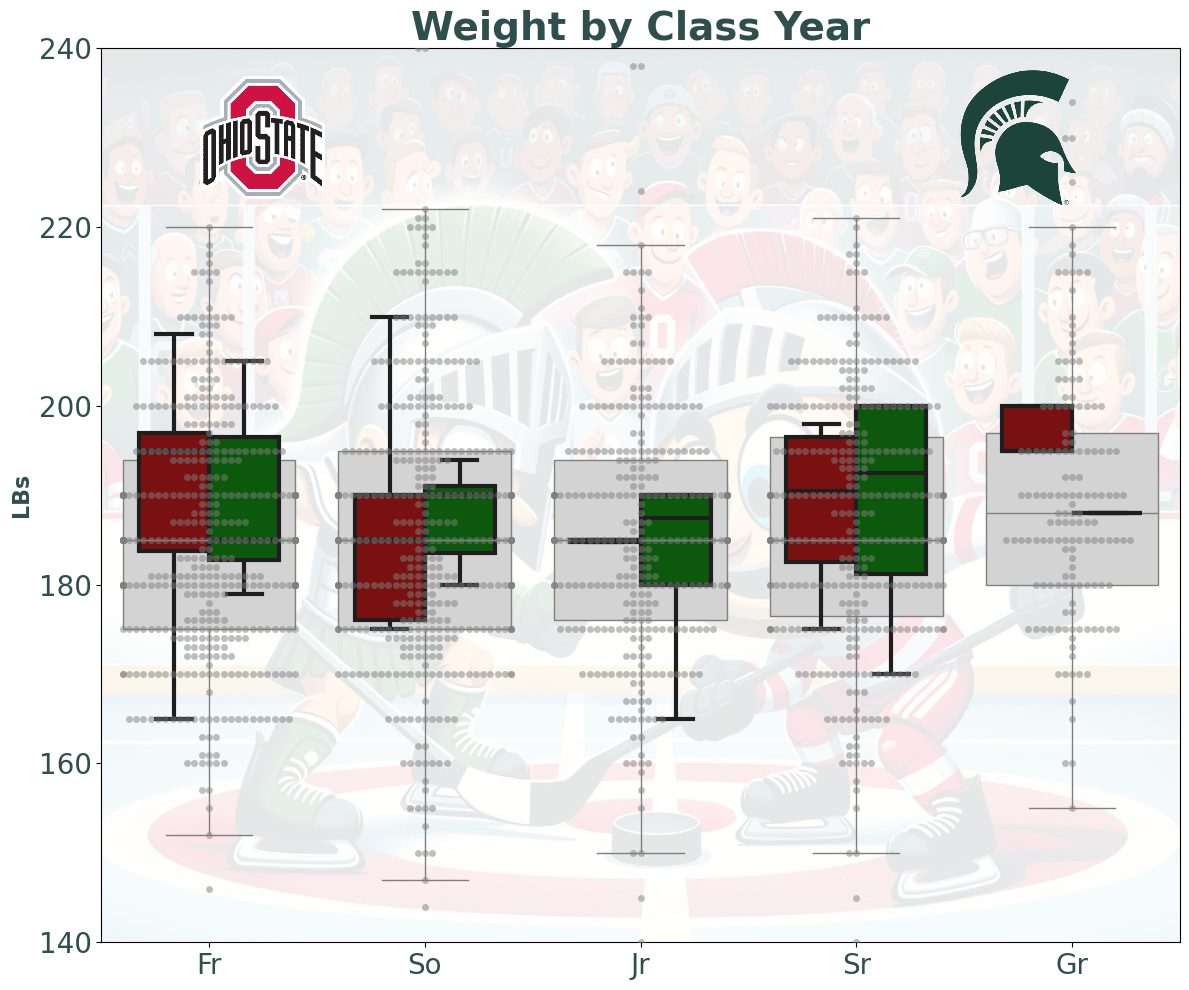

c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 44.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 44.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\

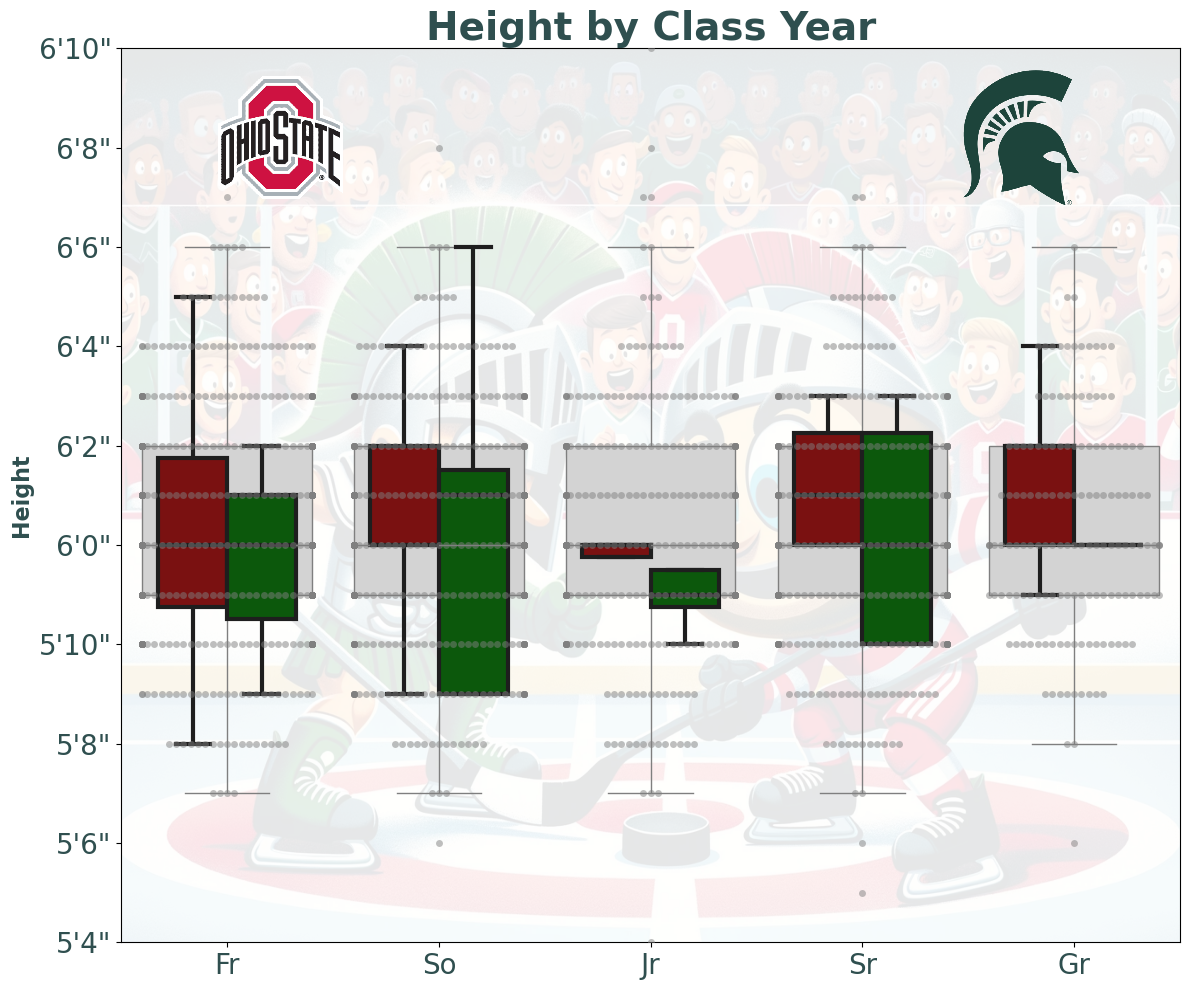

c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Justin\AppData\Local\Temp\ipykernel_16116\3377886618.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_16116\3377886618.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_ti

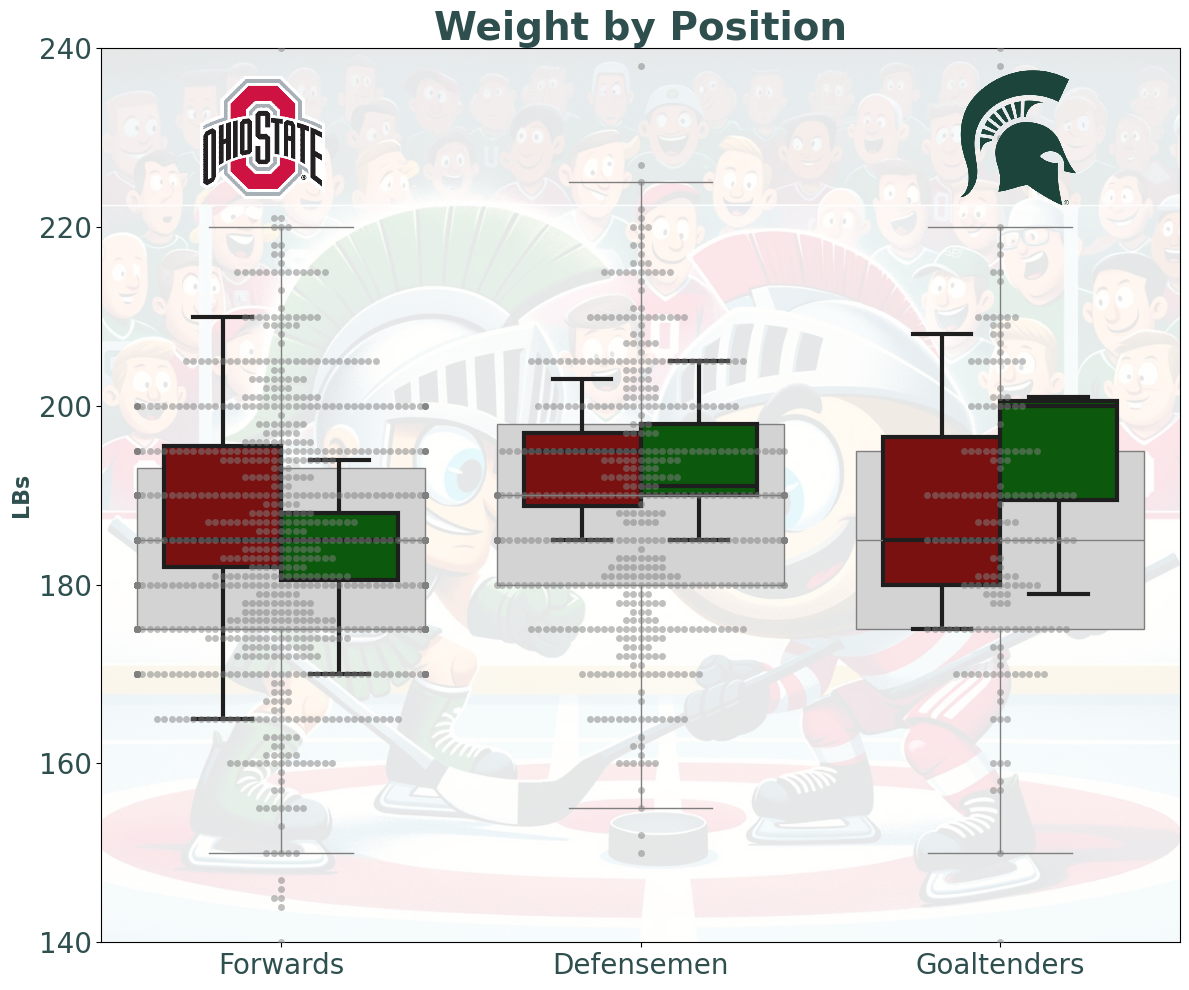

c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Justin\AppData\Local\Temp\ipykernel_16116\3377886618.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_16116\3377886618.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_ti

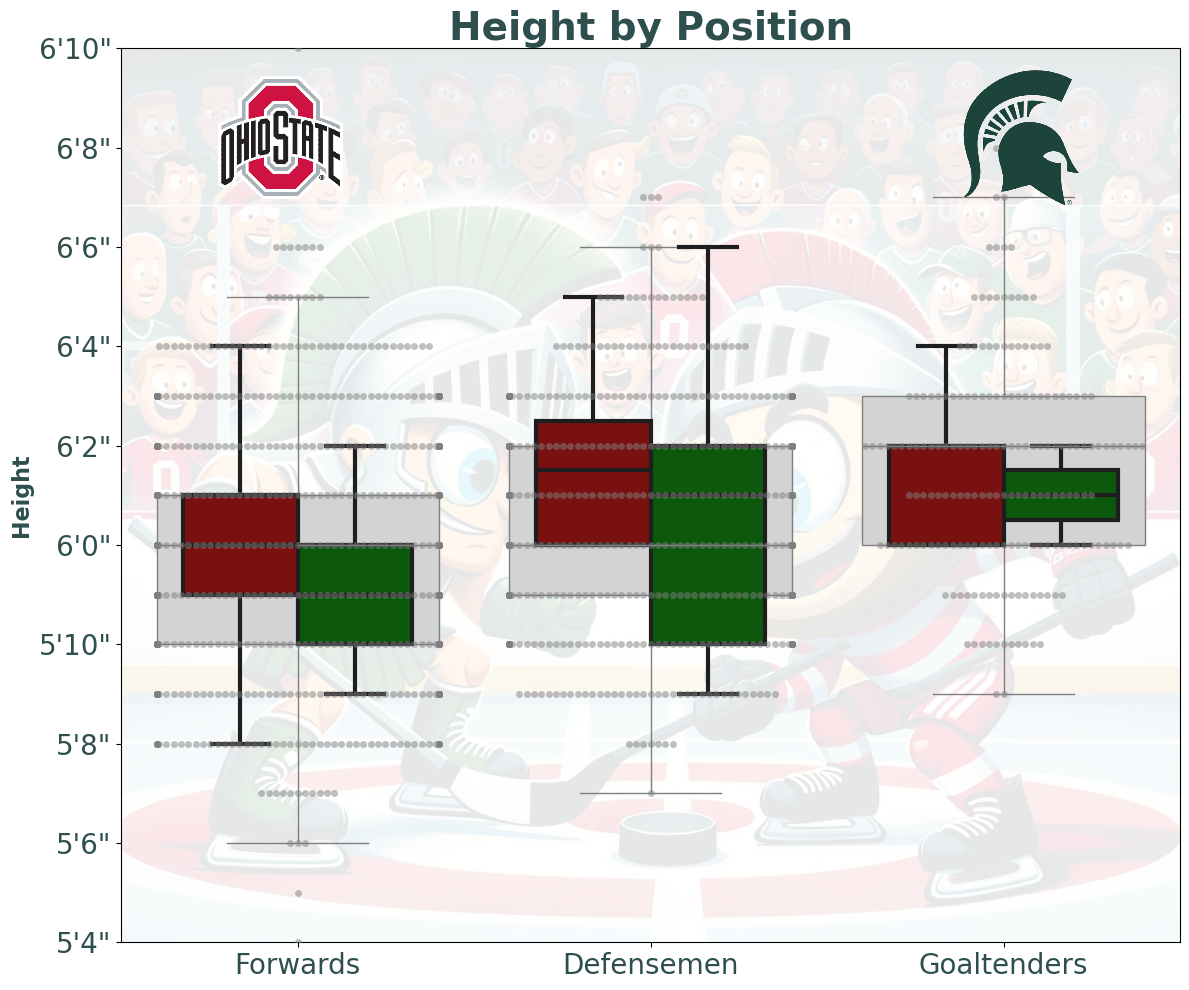

In [10]:
### Set the Output Folder for the images
TEMP_FOLDER = '../../TEMP/'

# Set the order of the positions
position_order = ['Forwards', 'Defensemen', 'Goaltenders']

# Set the order of Class Rank
class_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']

# # Create a filtered dataframe for Two Schools We want to highlight
df_filtered = df_current[(df_current['School'] == team_1) | (df_current['School'] == team_2)]

########### OLD FUNCTION CREATE THE LEGEND - OLD CODE ###########
# # Custom legend handler
# class TeamLogoHandler(HandlerBase):
#     def __init__(self, image_path, zoom=0.3, x_offset=0, y_offset=0):
#         super().__init__()
#         self.image_path = image_path
#         self.zoom = zoom
#         self.x_offset = x_offset  # New offset for x
#         self.y_offset = y_offset  # New offset for y

#     def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
#         img = plt.imread(self.image_path)
#         img_artist = OffsetImage(img, zoom=self.zoom, resample=True)
#         img_artist.set_offset((x0 + width / 2 + self.x_offset, y0 + height / 2 + self.y_offset))
#         img_artist.set_transform(trans)
#         return [img_artist]


########### Create the Plots ###########
def generate_plot(x_col, y_col, title, x_order, y_label, df, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER):
    
    # Create subplot
    fig, ax = plt.subplots(1, 1, figsize=figure_size)
    
    # Set Axis ranges
    ax.set_xlim([0, len(x_order)])

    # Background Image
    x_range = ax.get_xlim()
    y_min = df[y_col].min()
    y_max = df[y_col].max()
    ax.imshow(bg_img, aspect='auto', extent=[((x_range[0])-1), x_range[1], y_min, y_max], alpha=0.1, zorder=0)

    # Plots
    sns.boxplot(x=x_col, y=y_col, data=df, color='lightgrey', showfliers=False, ax=ax, order=x_order)
    sns.swarmplot(x=x_col, y=y_col, data=df, color='grey', alpha=0.5, ax=ax, order=x_order)
    sns.boxplot(x=x_col, y=y_col, data=df_filtered, hue='School', ax=ax, palette=team_colors, showfliers=False, order=x_order, width=0.65, linewidth=3)

    # Titles and Labels
    ax.set_title(title, fontdict=font_title_param)
    ax.set_ylabel(y_label, fontdict=font_label_param)
    ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
    ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)
    ax.set_xlabel('')

    ########## Conver the tick marks to feet and inches in the Height Plots ##########
    # Check if y_col is for height and then apply the conversion
    if y_col == 'Height_Inches':
        ax.set_yticks(ax.get_yticks())
        ax.set_yticklabels([f'{int(tick // 12)}\'{int(tick % 12)}"' for tick in ax.get_yticks()], fontdict=font_tick_param)
    else:
        ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)

    
    # Get upper bounds of the axis
    x_max = ax.get_xlim()[1]
    y_max = ax.get_ylim()[1]

    # Define a function to place logos at given coordinates
    def place_logo(image_path, xy, ax, zoom=0.3):
        img = plt.imread(image_path)
        imagebox = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(imagebox, xy, frameon=False, pad=0, xycoords='axes fraction', boxcoords="axes fraction")
        ax.add_artist(ab)

    # Place logos at upper corners
    place_logo(logo_folder + team_1_logo, (0.80, 0.90), ax)  # Upper left corner
    place_logo(logo_folder + team_2_logo, (0.20, 0.90), ax)  # Upper right corner



    #### OLD CODE FOR CREATING THE LEGEND ####
    # ############## Create Custom Legend with School Logos ##############
    # # Logo-based legend
    # # Placeholder for the legend
    # line1 = Line2D([0], [0], color='w', lw=0)
    # line2 = Line2D([0], [0], color='w', lw=0)

    # # Register the custom handler
    #     # Register the custom handler with offsets
    # plt.legend(handles=[line1, line2], labels=[team_1, team_2], handler_map={
    #     line1: TeamLogoHandler(logo_folder + team_1_logo, x_offset=800, y_offset=800), 
    #     line2: TeamLogoHandler(logo_folder + team_2_logo, x_offset=350, y_offset=800)  # Adjust offsets as needed
    # })


    # # # Drop Legend
    ax.get_legend().remove()

    plt.tight_layout()
    
    # Save Plot
    plt.savefig(f'{TEMP_FOLDER}/images/{title}.png', bbox_inches='tight', dpi=300)
    plt.show()

# Weight by Class Rank:
generate_plot('Yr.', 'Wt.', 'Weight by Class Year', ['Fr', 'So', 'Jr', 'Sr', 'Gr'], 'LBs', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# Height by Class Rank:
generate_plot('Yr.', 'Height_Inches', 'Height by Class Year', ['Fr', 'So', 'Jr', 'Sr', 'Gr'], 'Height', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# Weight by Position:
generate_plot('Position', 'Wt.', 'Weight by Position', ['Forwards', 'Defensemen', 'Goaltenders'], 'LBs', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# Height by Position:
generate_plot('Position', 'Height_Inches', 'Height by Position', ['Forwards', 'Defensemen', 'Goaltenders'], 'Height', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)



# Statistical Plots
- Skater plots for Goals, Assist, PIMs and Shots

- 